In [1]:
import numpy as np
import keras
from keras.models import Sequential
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
dataset=np.loadtxt("lstm_in100_out10_d100_x0.1_r4.csv", delimiter=",")


i_lenght=100
o_lenght=10
data=dataset[:,0:i_lenght].copy()
label=dataset[:,i_lenght:].copy()

print(data.shape,label.shape)

dtrain,dtest,ltrain,ltest=train_test_split(data,label,train_size=0.7,random_state=1)


(100, 100) (100, 10)


30/30 [==============================] - 0s 2ms/step
0.13170310854911804
n: 5 
 mse: 0.13170310854911804


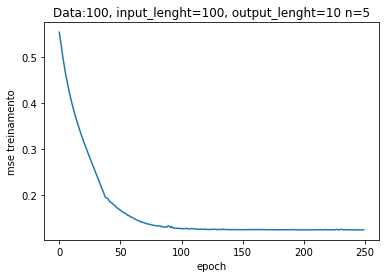

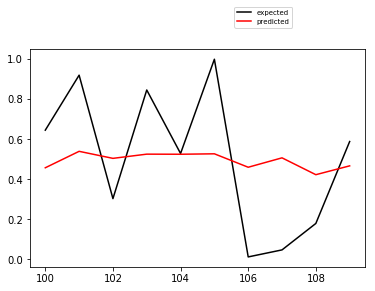

30/30 [==============================] - 0s 2ms/step
0.13037995994091034
n: 10 
 mse: 0.13037995994091034


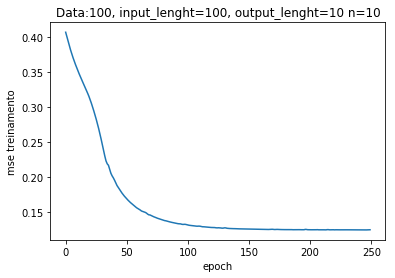

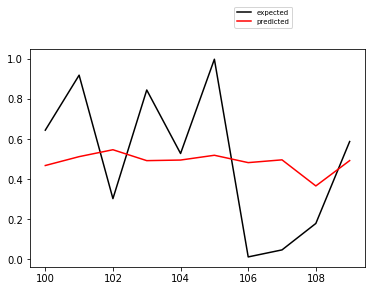

30/30 [==============================] - 0s 4ms/step
0.13017943501472473
n: 15 
 mse: 0.13017943501472473


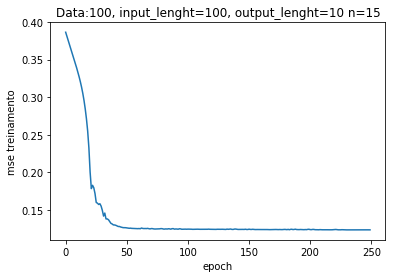

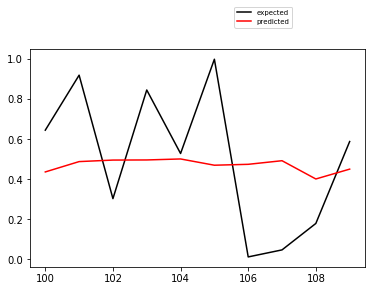

30/30 [==============================] - 0s 2ms/step
0.13273636996746063
n: 20 
 mse: 0.13273636996746063


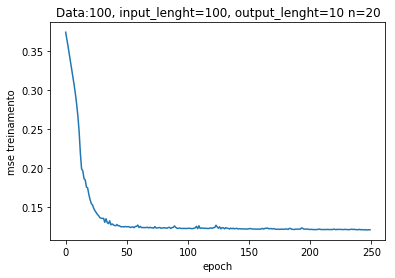

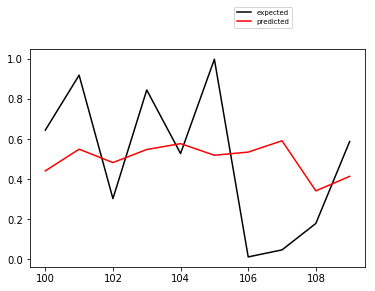

30/30 [==============================] - 0s 4ms/step
0.13328245282173157
n: 25 
 mse: 0.13328245282173157


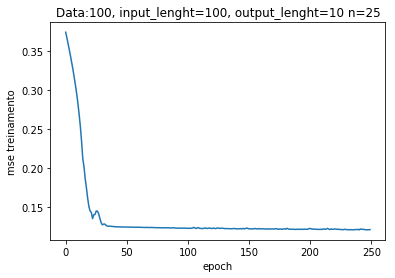

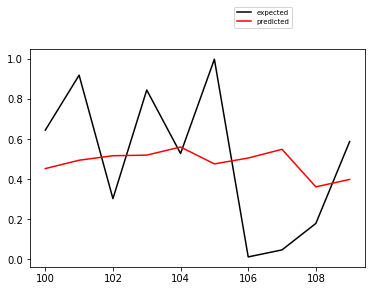

30/30 [==============================] - 0s 3ms/step
0.13059844076633453
n: 30 
 mse: 0.13059844076633453


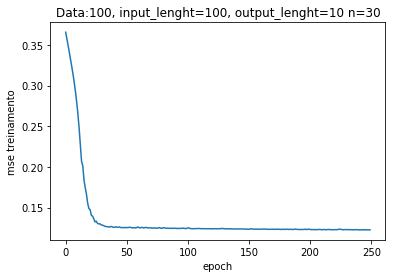

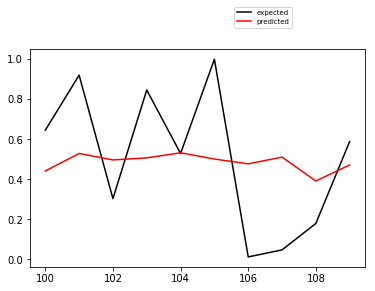

30/30 [==============================] - 0s 3ms/step
0.13434752821922302
n: 35 
 mse: 0.13434752821922302


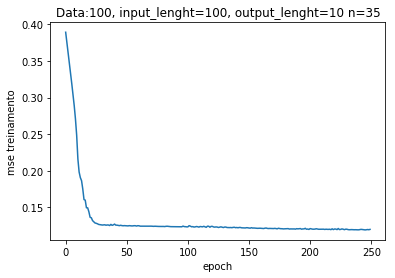

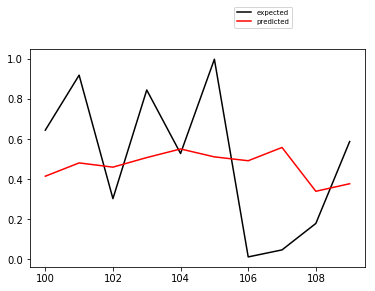

30/30 [==============================] - 0s 2ms/step
0.13641582429409027
n: 40 
 mse: 0.13641582429409027


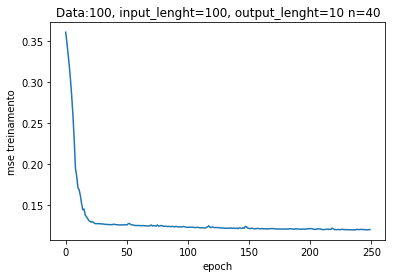

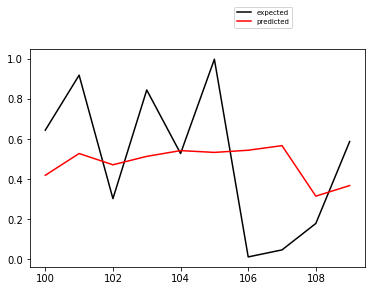

30/30 [==============================] - 0s 732us/step
0.13088351488113403
n: 45 
 mse: 0.13088351488113403


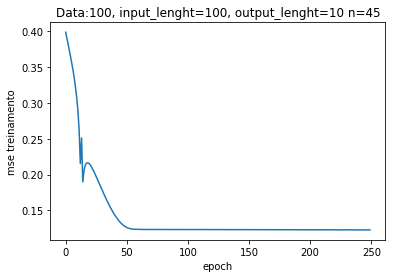

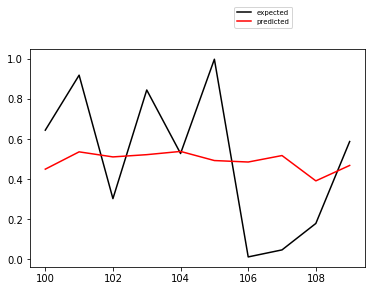

30/30 [==============================] - 0s 1ms/step
0.2748517096042633
n: 50 
 mse: 0.2748517096042633


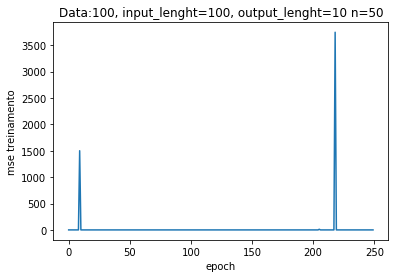

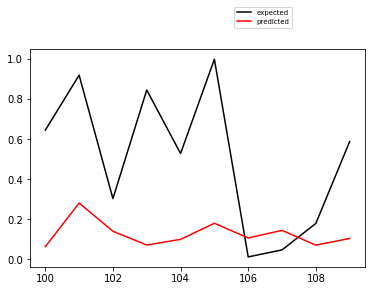

30/30 [==============================] - 0s 1ms/step
0.18542252480983734
n: 60 
 mse: 0.18542252480983734


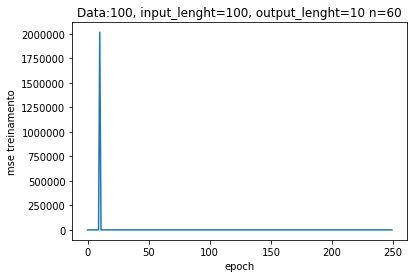

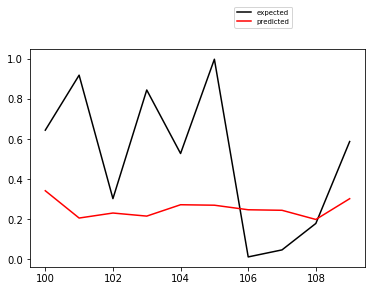

30/30 [==============================] - 0s 877us/step
0.13126491010189056
n: 70 
 mse: 0.13126491010189056


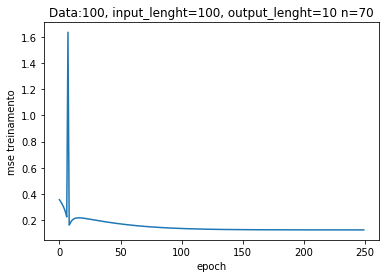

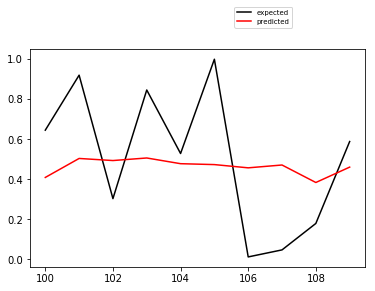

30/30 [==============================] - 0s 977us/step
0.1322539746761322
n: 80 
 mse: 0.1322539746761322


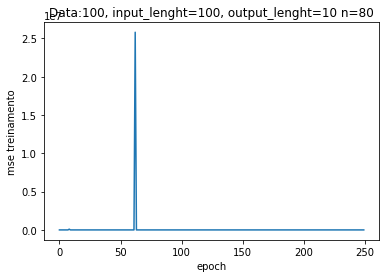

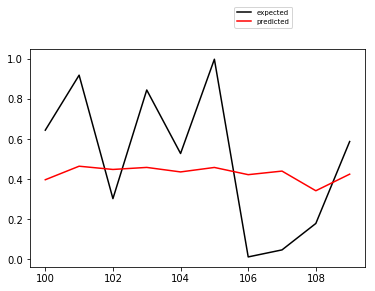

30/30 [==============================] - 0s 1ms/step
0.24326184391975403
n: 90 
 mse: 0.24326184391975403


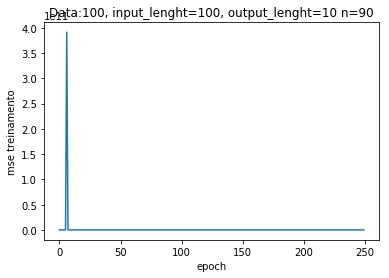

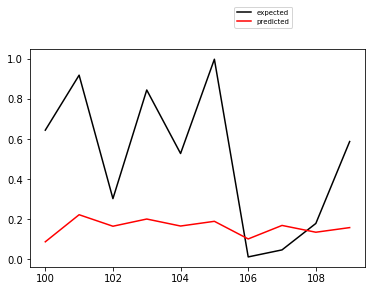

30/30 [==============================] - 0s 915us/step
0.13204649090766907
n: 100 
 mse: 0.13204649090766907


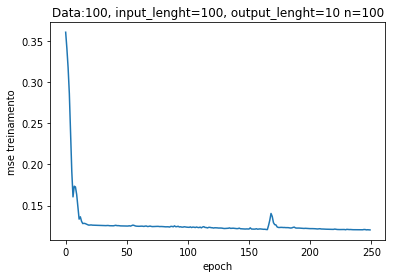

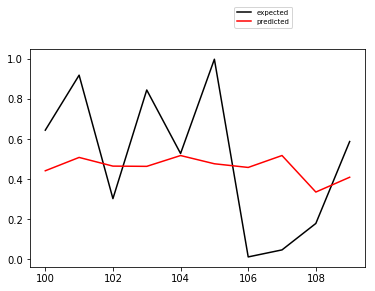

30/30 [==============================] - 0s 2ms/step
nan
n: 200 
 mse: nan


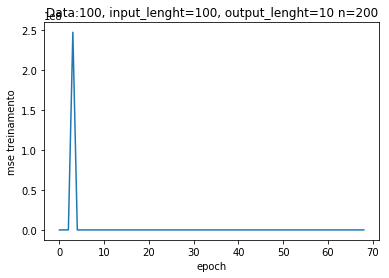

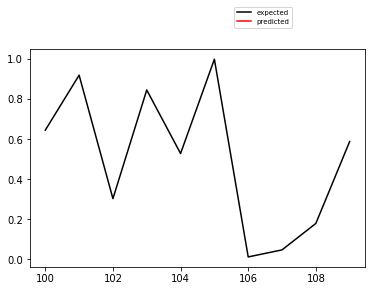

30/30 [==============================] - 0s 4ms/step
nan
n: 300 
 mse: nan


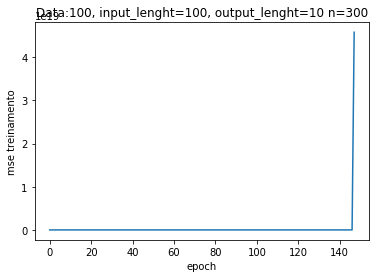

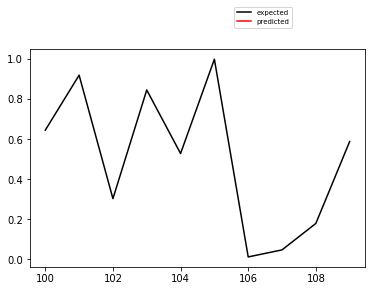

30/30 [==============================] - 0s 2ms/step
0.14411219954490662
n: 400 
 mse: 0.14411219954490662


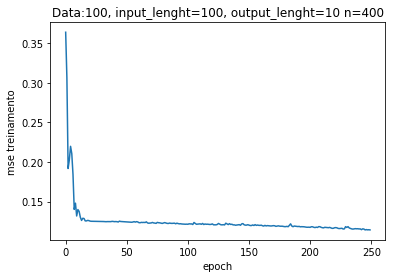

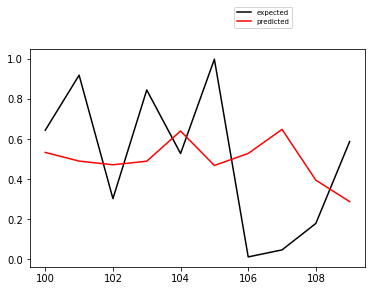

30/30 [==============================] - 0s 3ms/step
0.36571988463401794
n: 500 
 mse: 0.36571988463401794


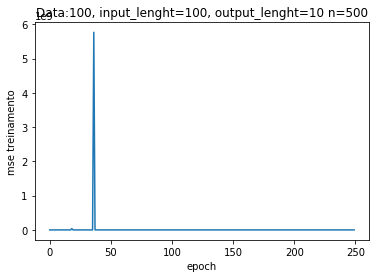

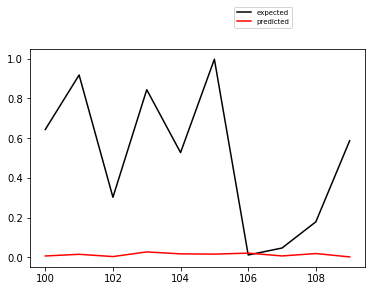

30/30 [==============================] - 0s 4ms/step
nan
n: 600 
 mse: nan


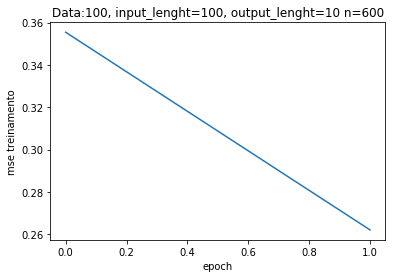

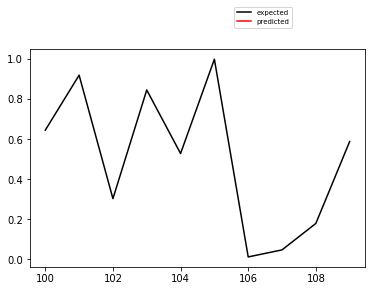

30/30 [==============================] - 0s 7ms/step
nan
n: 700 
 mse: nan


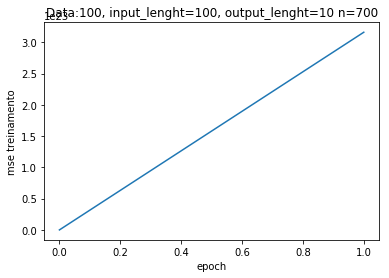

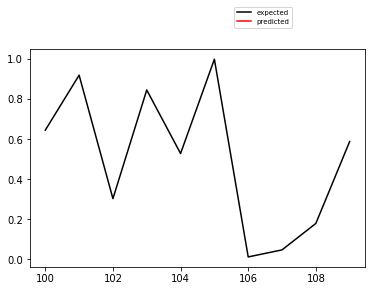

30/30 [==============================] - 0s 5ms/step
nan
n: 800 
 mse: nan


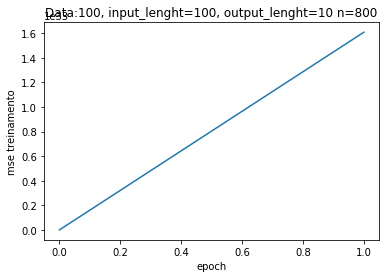

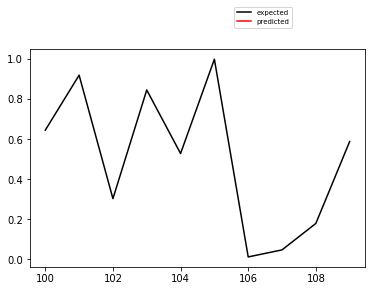

30/30 [==============================] - 0s 9ms/step
nan
n: 900 
 mse: nan


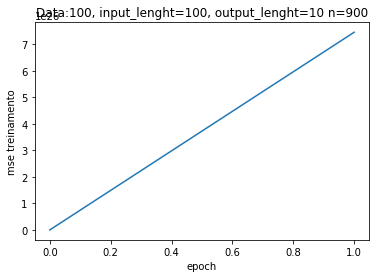

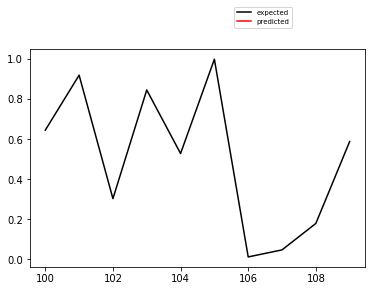

30/30 [==============================] - 0s 15ms/step
nan
n: 1000 
 mse: nan


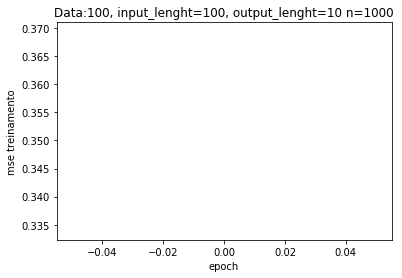

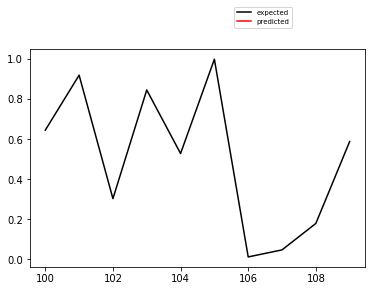

[(5, 0.12369093362774168, 0.13170310854911804), (10, 0.1239279500075749, 0.13037995994091034), (15, 0.12320439709084374, 0.13017943501472473), (20, 0.12040029593876429, 0.13273636996746063), (25, 0.1203269036752837, 0.13328245282173157), (30, 0.12242174723318645, 0.13059844076633453), (35, 0.11951653233596257, 0.13434752821922302), (40, 0.11969104153769357, 0.13641582429409027), (45, 0.12255572783095496, 0.13088351488113403), (50, 0.26241665823119026, 0.2748517096042633), (60, 0.17942068449088505, 0.18542252480983734), (70, 0.12463394850492478, 0.13126491010189056), (80, 0.12502806995596205, 0.1322539746761322), (90, 0.22528828935963766, 0.24326184391975403), (100, 0.12087413051298686, 0.13204649090766907), (200, nan, nan), (300, nan, nan), (400, 0.11400118299892971, 0.14411219954490662), (500, 0.35848270228930884, 0.36571988463401794), (600, nan, nan), (700, nan, nan), (800, nan, nan), (900, nan, nan), (1000, nan, nan)]


In [12]:
results = []

n = 5
while n<=1000:
    
    model = Sequential()
    model.add(keras.layers.LSTM(n, activation='relu', input_shape=(i_lenght, 1)))
    model.add(keras.layers.Dense(o_lenght)) 

    model.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')
    
    dtrain = dtrain.reshape((dtrain.shape[0],i_lenght,1))

    dtest = dtest.reshape((dtest.shape[0],i_lenght,1))
    
    history = model.fit(dtrain, ltrain, epochs=250,verbose=0)
    
    msetrain = model.evaluate(dtrain, ltrain)
    mse = model.evaluate(dtest, ltest)
    print(mse)
    
    line = np.empty((3))
    line = n, msetrain, mse
    
    results.append(line)
    
    print('n:',n,'\n mse:',mse)
    
    plt.plot(history.history['loss'])
    plt.title('Data:100, input_lenght=100, output_lenght=10 n=%d' %n)
    plt.ylabel('mse treinamento')
    plt.xlabel('epoch')
    plt.show()
    
    prediction = model.predict(dtest[0,:].reshape((1,i_lenght,1)))
    
    
    plt.plot(range(i_lenght,i_lenght+o_lenght),ltest[0,:],'k',label="expected")
    plt.plot(range(i_lenght,i_lenght+o_lenght),prediction.T,'r', label="predicted")
    lo,hi = plt.ylim()
    #plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(loc=(0.61,1.1),fontsize='x-small')
    plt.show()
    
    if n < 50:
        n = n+5
    elif n < 100:
        n = n+10
    elif n < 1000:
        n = n+100
    else:
        n = n+1000
        
print(results)
            


    


[[5.00000000e+00 1.23690934e-01 1.31703109e-01]
 [1.00000000e+01 1.23927950e-01 1.30379960e-01]
 [1.50000000e+01 1.23204397e-01 1.30179435e-01]
 [2.00000000e+01 1.20400296e-01 1.32736370e-01]
 [2.50000000e+01 1.20326904e-01 1.33282453e-01]
 [3.00000000e+01 1.22421747e-01 1.30598441e-01]
 [3.50000000e+01 1.19516532e-01 1.34347528e-01]
 [4.00000000e+01 1.19691042e-01 1.36415824e-01]
 [4.50000000e+01 1.22555728e-01 1.30883515e-01]
 [5.00000000e+01 2.62416658e-01 2.74851710e-01]
 [6.00000000e+01 1.79420684e-01 1.85422525e-01]
 [7.00000000e+01 1.24633949e-01 1.31264910e-01]
 [8.00000000e+01 1.25028070e-01 1.32253975e-01]
 [9.00000000e+01 2.25288289e-01 2.43261844e-01]
 [1.00000000e+02 1.20874131e-01 1.32046491e-01]
 [2.00000000e+02            nan            nan]
 [3.00000000e+02            nan            nan]
 [4.00000000e+02 1.14001183e-01 1.44112200e-01]
 [5.00000000e+02 3.58482702e-01 3.65719885e-01]
 [6.00000000e+02            nan            nan]
 [7.00000000e+02            nan         

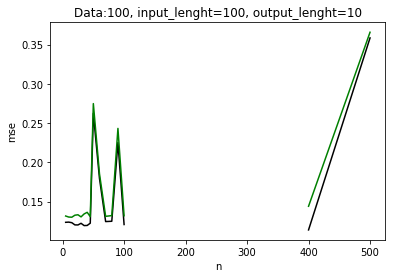

In [13]:
results = np.asarray(results)

print(results)
results_c=results.copy()

plt.plot(results[:,0],results[:,1], 'k',label='train')
plt.title('Data:100, input_lenght=100, output_lenght=10')
plt.ylabel('mse ')
plt.xlabel('n')

plt.plot(results[:,0],results[:,2],'g',label='test')
plt.title('Data:100, input_lenght=100, output_lenght=10')
plt.ylabel('mse')
plt.xlabel('n')
          
          
plt.show()